# Analysis of Accelerator-VC Bipartite Networks

Analysis of the USA accelerator-VC network using ecological metrics inspired by Theo's work on complex networks in entrepreneurial ecosystems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import sys

# sys.path.append('../../') 

# Import custom modules
from libs.data_cleaning import *
from libs.data_extraction import *
from libs.network_analysis import *

plt.style.use('default')
sns.set_palette('husl')

## Data Loading and Preparation

In [2]:
country = "us"
data_dir = f'../../data/{country}'

cleaned_data = load_clean_data(data_dir)

companies_clean = cleaned_data['companies']
investors_clean = cleaned_data['investors']
investments_clean = cleaned_data['investments']
funding_rounds_clean = cleaned_data['funding_rounds']

print(f"After cleaning:")
print(f"Companies: {len(companies_clean):,}")
print(f"Investors: {len(investors_clean):,}")
print(f"Investments: {len(investments_clean):,}")
print(f"Funding rounds: {len(funding_rounds_clean):,}")

After cleaning:
Companies: 22,527
Investors: 38,843
Investments: 147,832
Funding rounds: 268,283


## VC-Bipartite Network Construction

Early-stage:
- Pre-seed
- Seed
- Series A

Late-stage:
- Series B em diante (B, C, D...)

In [3]:
vc_investments = extract_vc_investments(cleaned_data['investments'])

vc_investments['investor_uuid'] = vc_investments[['investor_uuid', 'investment_type']].agg('-'.join, axis=1)
vc_investments['investor_name'] = vc_investments[['investor_name', 'investment_type']].agg('-'.join, axis=1)

early_stages = set(['angel', 'pre_seed', 'seed', 'series_a'])
vc_early_investments = vc_investments[vc_investments['investment_type'].isin(early_stages)]

late_stages = set(['series_b', 'series_c', 'series_d', 'series_e', 'series_f', 'series_g', 'series_h', 'series_i', 'series_unknown'])
vc_late_investments = vc_investments[vc_investments['investment_type'].isin(late_stages)]

print("\nSample of VC investments:")
display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
print(vc_investments[display_cols].head())

print("\VC-VC pairs:")
vc_vc_investments_pairs = create_investment_pairs(vc_early_investments, vc_late_investments, 'left_vc', 'right_vc')
vc_vc_investments_pairs['announced_year'] = vc_vc_investments_pairs[['announced_year_left_vc', 'announced_year_right_vc']].max(axis=1)
vc_vc_investments_pairs['total_funding_usd'] = (vc_vc_investments_pairs['total_funding_usd_left_vc'])
print(vc_vc_investments_pairs[['org_uuid', 'investor_name_left_vc', 'total_funding_usd_left_vc','total_funding_usd_right_vc']].head())

Found 104618 VC investments
Unique companies with VC funding: 16932

Sample of VC investments:
  company_name                        investor_name            investor_types  \
0       Scribd                    Redpoint-series_a           venture capital   
1      MeetMoi       Acadia Woods Partners-series_a           venture capital   
2        OpenX         First Round Capital-series_a           venture capital   
3        OpenX  Oreilly AlphaTech Ventures-series_a  micro vc,venture capital   
4        OpenX   Mangrove Capital Partners-series_a           venture capital   

   total_funding_usd  
0        106750000.0  
1          5575000.0  
2         70511200.0  
3         70511200.0  
4         70511200.0  
\VC-VC pairs:
Created 200727 investment pairs
Covering 5237 unique investors
                               org_uuid investor_name_left_vc  \
0  21e77067-5537-408e-cad7-e5e72bb6ad86     Redpoint-series_a   
1  21e77067-5537-408e-cad7-e5e72bb6ad86     Redpoint-series_a   
2  21e77

## Static Ecological Network Analysis

Analysis using ecological metrics inspired by Carniel's framework.

In [4]:
""" # Bbipartite analysis with ecological metrics
network_analysis = analyze_bipartite_structure_robust(
    vc_vc_investments_pairs[['investor_name_left_vc', 'investor_name_right_vc', 'total_funding_usd']],
    'investor_name_left_vc',
    'investor_name_right_vc',
    'total_funding_usd',
    'VCs left',
    'VCs right',
    handle_overlap='suffix'
)

# Extract key metrics
basic_metrics = network_analysis['basic_metrics']
ecological_summary = network_analysis['ecological_summary']

print("=== Network Structure ===")
print(f"Nodes: {basic_metrics['num_nodes']} ({basic_metrics['set_0_size']} accelerators + {basic_metrics['set_1_size']} VCs)")
print(f"Edges: {basic_metrics['num_edges']}")
print(f"Density: {basic_metrics['density']:.3f}")
print(f"Components: {basic_metrics['num_components']}")

print("\n=== Ecological Metrics ===")
print(f"Connectance: {ecological_summary['connectance']:.3f}") # Or density
print(f"Nestedness (NODF): {ecological_summary['nestedness_nodf']:.1f}")
print(f"Modularity: {ecological_summary['modularity']:.3f}") """

' # Bbipartite analysis with ecological metrics\nnetwork_analysis = analyze_bipartite_structure_robust(\n    vc_vc_investments_pairs[[\'investor_name_left_vc\', \'investor_name_right_vc\', \'total_funding_usd\']],\n    \'investor_name_left_vc\',\n    \'investor_name_right_vc\',\n    \'total_funding_usd\',\n    \'VCs left\',\n    \'VCs right\',\n    handle_overlap=\'suffix\'\n)\n\n# Extract key metrics\nbasic_metrics = network_analysis[\'basic_metrics\']\necological_summary = network_analysis[\'ecological_summary\']\n\nprint("=== Network Structure ===")\nprint(f"Nodes: {basic_metrics[\'num_nodes\']} ({basic_metrics[\'set_0_size\']} accelerators + {basic_metrics[\'set_1_size\']} VCs)")\nprint(f"Edges: {basic_metrics[\'num_edges\']}")\nprint(f"Density: {basic_metrics[\'density\']:.3f}")\nprint(f"Components: {basic_metrics[\'num_components\']}")\n\nprint("\n=== Ecological Metrics ===")\nprint(f"Connectance: {ecological_summary[\'connectance\']:.3f}") # Or density\nprint(f"Nestedness (NODF)

#### Comments

...

## Time Series Ecological Network Analysis

In [5]:
# Extract year from funding rounds for time series analysis
# Merge investment data with funding rounds to get temporal information
# vc_vc_inv_pairs_ts = vc_vc_investments_pairs.copy()
# Count occurrences of each VC across both columns
all_vcs = pd.Series(
  list(vc_vc_investments_pairs['investor_name_left_vc']) + 
  list(vc_vc_investments_pairs['investor_name_right_vc'])
)
vc_counts = all_vcs.value_counts()

# Get the top 30% most connected VCs
top_30_percent = int(len(vc_counts) * 0.3)
top_vcs = vc_counts.head(top_30_percent).index.tolist()

# Filter to keep only connections between top VCs
vc_vc_inv_pairs_ts = vc_vc_investments_pairs[
  (vc_vc_investments_pairs['investor_name_left_vc'].isin(top_vcs)) & 
  (vc_vc_investments_pairs['investor_name_right_vc'].isin(top_vcs))
].copy()

print(f"Filtered to {len(vc_vc_inv_pairs_ts)} investments between top {len(top_vcs)} VCs")

# Convert to datetime and extract year
# vc_vc_inv_pairs_ts['announced_year'] = pd.to_datetime(vc_vc_inv_pairs_ts['announced_year'])
vc_vc_inv_pairs_ts['year'] = vc_vc_inv_pairs_ts['announced_year']

# Get the range of years
min_year = 2005
max_year = 2023

# Filter out rows with missing dates
vc_vc_inv_pairs_ts = vc_vc_inv_pairs_ts.dropna(subset=['year'])
vc_vc_inv_pairs_ts = vc_vc_inv_pairs_ts[(vc_vc_inv_pairs_ts['year'] >= min_year) & (vc_vc_inv_pairs_ts['year'] <= max_year)]


print(f"Time series analysis from {min_year} to {max_year}")
print(f"Total investments with dates: {len(vc_vc_inv_pairs_ts):,}")

# Show distribution by year
year_counts = vc_vc_inv_pairs_ts['year'].value_counts().sort_index()
print(f"\nInvestments per year:")
print(year_counts)

Filtered to 131756 investments between top 6064 VCs
Time series analysis from 2005 to 2023
Total investments with dates: 125,489

Investments per year:
year
2005      165
2006      122
2007      188
2008      206
2009      218
2010      376
2011      628
2012      599
2013     1118
2014     2176
2015     4430
2016     6304
2017     7816
2018    11040
2019    15655
2020    18198
2021    33099
2022    17152
2023     5999
Name: count, dtype: int64


### Snapshot-based analysis

In [7]:
# Initialize storage for time series metrics
time_series_metrics = []

# Minimum number of edges required for meaningful analysis
min_edges_threshold = 10

print("Computing ecological metrics for each year...")
print("=" * 50)

# Loop through each year and calculate metrics
for year in range(min_year, max_year + 1):
    cur_year_vc_vc_inv_pairs = vc_vc_inv_pairs_ts[vc_vc_inv_pairs_ts['year'] == year]

    if len(cur_year_vc_vc_inv_pairs) < min_edges_threshold:
        print(f"Year {year}: Skipping (only {len(cur_year_vc_vc_inv_pairs)} investments)")
        continue
    
    try:
        # Extract bipartite edges for this year
        """ year_edges = extract_bipartite_edges_from_pairs(
            cur_year_vc_vc_inv_pairs,
            'investor_name_left_vc',
            'investor_name_right_vc',
            'total_funding_usd'
        ) """

        # Analyze bipartite structure for this year
        year_analysis = analyze_bipartite_structure_robust(
            cur_year_vc_vc_inv_pairs[['investor_name_left_vc', 'investor_name_right_vc', 'total_funding_usd']],
            'investor_name_left_vc',
            'investor_name_right_vc',
            'total_funding_usd',
            'VCs left',
            'VCs right',
            handle_overlap='suffix'
        )
        
        # Extract metrics
        basic_metrics = year_analysis['basic_metrics']
        ecological_summary = year_analysis['ecological_summary']
        
        # Store metrics for this year
        year_metrics = {
            'year': year,
            'num_nodes': basic_metrics['num_nodes'],
            'num_vcs_left': basic_metrics['set_0_size'],
            'num_vcs_right': basic_metrics['set_1_size'],
            'num_edges': basic_metrics['num_edges'],
            'density': basic_metrics['density'],
            'connectance': ecological_summary['connectance'],
            'nestedness_nodf': ecological_summary['nestedness_nodf'],
            'modularity': ecological_summary['modularity'],
            # 'cross_assortativity': ecological_summary['cross_assortativity'],
            'num_components': basic_metrics['num_components']
        }
        
        time_series_metrics.append(year_metrics)
        
        print(f"Year {year}: {basic_metrics['num_nodes']} nodes, {basic_metrics['num_edges']} edges, "
              f"Connectance: {ecological_summary['connectance']:.3f}, "
              f"Nestedness: {ecological_summary['nestedness_nodf']:.1f}, "
              f"Modularity: {ecological_summary['modularity']:.3f}")
        
    except Exception as e:
        print(f"Year {year}: Error - {str(e)}")
        continue

print(f"\nSuccessfully analyzed {len(time_series_metrics)} years")

Computing ecological metrics for each year...
Year 2005: 111 nodes, 163 edges, Connectance: 0.053, Nestedness: 4.1, Modularity: 0.454
Year 2006: 117 nodes, 119 edges, Connectance: 0.035, Nestedness: 2.4, Modularity: 0.462
Year 2007: 148 nodes, 178 edges, Connectance: 0.033, Nestedness: 2.4, Modularity: 0.459
Year 2008: 172 nodes, 197 edges, Connectance: 0.027, Nestedness: 2.7, Modularity: 0.448
Year 2009: 179 nodes, 212 edges, Connectance: 0.026, Nestedness: 1.9, Modularity: 0.475
Year 2010: 271 nodes, 365 edges, Connectance: 0.020, Nestedness: 2.1, Modularity: 0.465
Year 2011: 351 nodes, 602 edges, Connectance: 0.020, Nestedness: 2.7, Modularity: 0.420
Year 2012: 429 nodes, 576 edges, Connectance: 0.013, Nestedness: 1.5, Modularity: 0.453
Year 2013: 553 nodes, 1084 edges, Connectance: 0.014, Nestedness: 2.4, Modularity: 0.424
Year 2014: 929 nodes, 2087 edges, Connectance: 0.010, Nestedness: 1.9, Modularity: 0.379
Year 2015: 1277 nodes, 4272 edges, Connectance: 0.011, Nestedness: 2.3, 

In [8]:
# Convert to DataFrame for easier analysis and plotting
ts_df = pd.DataFrame(time_series_metrics)

if len(ts_df) > 0:
    print("Time Series Metrics Summary:")
    print(ts_df.describe().round(3))
    
    print(f"\nData available for years: {ts_df['year'].min()} to {ts_df['year'].max()}")
    print(f"Number of years analyzed: {len(ts_df)}")
else:
    print("No time series data available for analysis")

Time Series Metrics Summary:
           year  num_nodes  num_vcs_left  num_vcs_right  num_edges  density  \
count    19.000     19.000        19.000         19.000     19.000   19.000   
mean   2014.000   1390.947       755.211        635.737   6369.211    0.017   
std       5.627   1338.941       731.574        609.964   8547.677    0.013   
min    2005.000    111.000        56.000         55.000    119.000    0.006   
25%    2009.500    225.000       106.500        118.500    288.500    0.007   
50%    2014.000    929.000       483.000        446.000   2087.000    0.011   
75%    2018.500   2232.000      1284.500       1001.000   9115.000    0.023   
max    2023.000   4301.000      2259.000       2042.000  31755.000    0.053   

       connectance  nestedness_nodf  modularity  num_components  
count       19.000           19.000      19.000          19.000  
mean         0.017            2.176       0.378          26.474  
std          0.013            0.605       0.078           8.9

Evolution of ecological metrics over time in the accelerator-VC ecosystem.

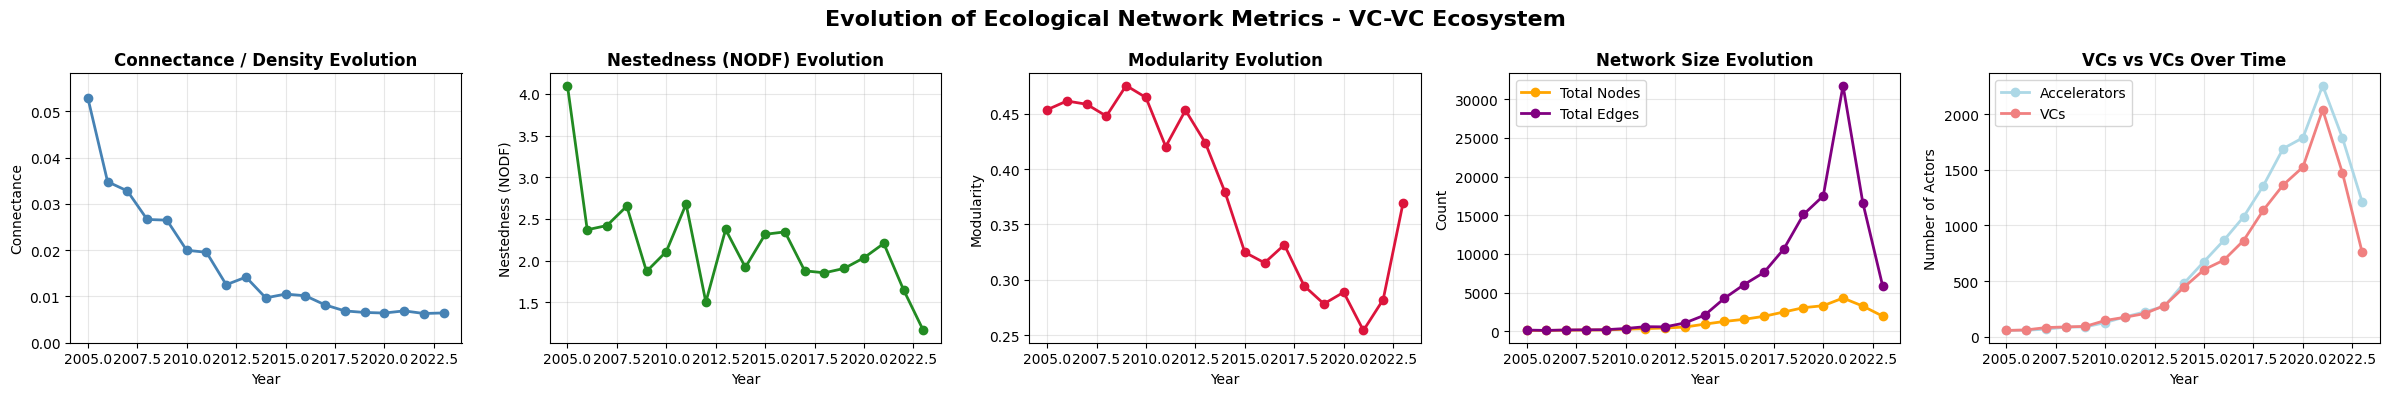

In [9]:
if len(ts_df) > 0:
    # Create comprehensive time series plot
    fig, axes = plt.subplots(1, 5, figsize=(24, 4))
    fig.suptitle('Evolution of Ecological Network Metrics - VC-VC Ecosystem', 
                 fontsize=16, fontweight='bold')
    
    # Connectance evolution
    axes[0].plot(ts_df['year'], ts_df['connectance'], 'o-', linewidth=2, markersize=6, color='steelblue')
    axes[0].set_title('Connectance / Density Evolution', fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Connectance')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, max(ts_df['connectance']) * 1.1)
    
    # Nestedness evolution
    axes[1].plot(ts_df['year'], ts_df['nestedness_nodf'], 'o-', linewidth=2, markersize=6, color='forestgreen')
    axes[1].set_title('Nestedness (NODF) Evolution', fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Nestedness (NODF)')
    axes[1].grid(True, alpha=0.3)
    
    # Modularity evolution
    axes[2].plot(ts_df['year'], ts_df['modularity'], 'o-', linewidth=2, markersize=6, color='crimson')
    axes[2].set_title('Modularity Evolution', fontweight='bold')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Modularity')
    axes[2].grid(True, alpha=0.3)
    
    # Network size evolution
    axes[3].plot(ts_df['year'], ts_df['num_nodes'], 'o-', linewidth=2, markersize=6, color='orange', label='Total Nodes')
    axes[3].plot(ts_df['year'], ts_df['num_edges'], 'o-', linewidth=2, markersize=6, color='purple', label='Total Edges')
    axes[3].set_title('Network Size Evolution', fontweight='bold')
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Count')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    axes[4].plot(ts_df['year'], ts_df['num_vcs_left'], 'o-', linewidth=2, markersize=6, 
                color='lightblue', label='Accelerators')
    axes[4].plot(ts_df['year'], ts_df['num_vcs_right'], 'o-', linewidth=2, markersize=6, 
                color='lightcoral', label='VCs')
    axes[4].set_title('VCs vs VCs Over Time', fontweight='bold')
    axes[4].set_xlabel('Year')
    axes[4].set_ylabel('Number of Actors')
    axes[4].legend()
    axes[4].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for time series visualization")

=== Temporal Trends Analysis ===

Year-over-Year Changes (average):
connectance: -0.0026 per year (total: -0.0465)
nestedness_nodf: -0.1633 per year (total: -2.9388)
modularity: -0.0047 per year (total: -0.0847)
num_nodes: +103.1667 per year (total: +1857.0000)
num_edges: +318.8889 per year (total: +5740.0000)

Correlations between metrics and time:
connectance: r=-0.881 (decreasing trend)
nestedness_nodf: r=-0.638 (decreasing trend)
modularity: r=-0.874 (decreasing trend)


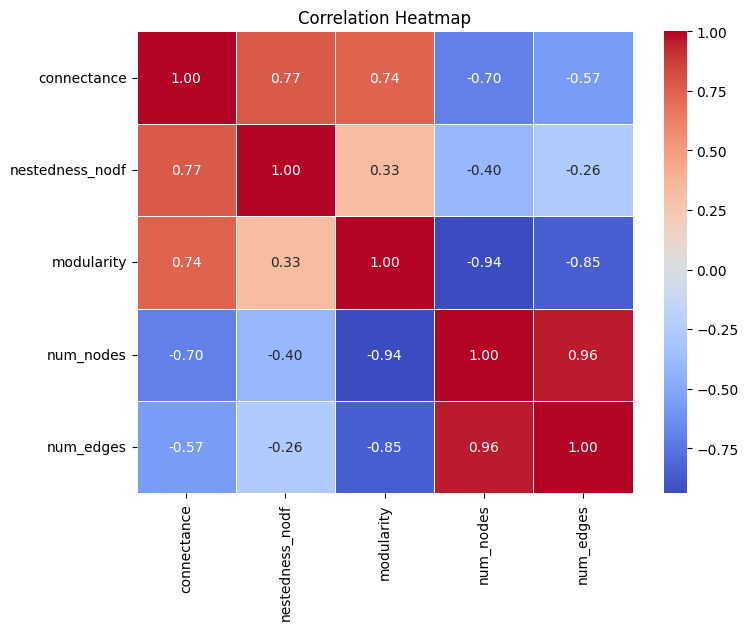

In [10]:
if len(ts_df) > 1:
    # Calculate trends and correlations
    print("=== Temporal Trends Analysis ===")
    
    # Calculate year-over-year changes
    ts_df_sorted = ts_df.sort_values('year')
    
    metrics_to_analyze = ['connectance', 'nestedness_nodf', 'modularity', 'num_nodes', 'num_edges']
    
    print("\nYear-over-Year Changes (average):")
    for metric in metrics_to_analyze:
        if metric in ts_df_sorted.columns:
            # Calculate differences
            diffs = ts_df_sorted[metric].diff().dropna()
            avg_change = diffs.mean()
            total_change = ts_df_sorted[metric].iloc[-1] - ts_df_sorted[metric].iloc[0]
            print(f"{metric}: {avg_change:+.4f} per year (total: {total_change:+.4f})")
    
    # Correlation analysis
    print("\nCorrelations between metrics and time:")
    for metric in ['connectance', 'nestedness_nodf', 'modularity']:
        if metric in ts_df.columns:
            correlation = ts_df['year'].corr(ts_df[metric])
            trend_direction = "increasing" if correlation > 0.1 else "decreasing" if correlation < -0.1 else "stable"
            print(f"{metric}: r={correlation:.3f} ({trend_direction} trend)")
            
    matrix = ts_df_sorted[metrics_to_analyze].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

else:
    print("Insufficient data for temporal trends analysis (need at least 2 years)")

### Cumulative network analysis (5 years window)

In [11]:
# Initialize storage for time series metrics
ts_cumulative_metrics = []
cumulative_window = 5

# Minimum number of edges required for meaningful analysis
min_edges_threshold = 10

print(f"Computing ecological metrics for each year ({cumulative_window} years window)...")
print("=" * 50)

# Loop through each year and calculate metrics
for year in range(min_year + cumulative_window, max_year + 1):
    cur_window_vc_vc_inv_pairs = vc_vc_inv_pairs_ts[(vc_vc_inv_pairs_ts['year'] <= year) & (vc_vc_inv_pairs_ts['year'] >= year - cumulative_window)]
    
    try:
        # Extract bipartite edges for this year
        """ window_edges = extract_bipartite_edges_from_pairs(
            cur_window_vc_vc_inv_pairs,
            'investor_name_left_vc',
            'investor_name_right_vc',
            'total_funding_usd'
        ) """
        
        # Analyze bipartite structure for this year
        window_analysis = analyze_bipartite_structure_robust(
            cur_window_vc_vc_inv_pairs[['investor_name_left_vc', 'investor_name_right_vc', 'total_funding_usd']],
            'investor_name_left_vc',
            'investor_name_right_vc',
            'total_funding_usd',
            'VCs left',
            'VCs right',
            handle_overlap='suffix'
        )
        
        # Extract metrics
        cumulative_basic_metrics = window_analysis['basic_metrics']
        cumulative_eco_summary = window_analysis['ecological_summary']
        
        # Store metrics for this year
        cumulative_year_metrics = {
            'year': year,
            'num_nodes': cumulative_basic_metrics['num_nodes'],
            'num_vcs_left': cumulative_basic_metrics['set_0_size'],
            'num_vcs_right': cumulative_basic_metrics['set_1_size'],
            'num_edges': cumulative_basic_metrics['num_edges'],
            'density': cumulative_basic_metrics['density'],
            'connectance': cumulative_eco_summary['connectance'],
            'nestedness_nodf': cumulative_eco_summary['nestedness_nodf'],
            'modularity': cumulative_eco_summary['modularity'],
            # 'cross_assortativity': cumulative_eco_summary['cross_assortativity'],
            'num_components': cumulative_basic_metrics['num_components']
        }
        
        ts_cumulative_metrics.append(cumulative_year_metrics)
        
        print(f"Year {year}: {cumulative_basic_metrics['num_nodes']} nodes, {cumulative_basic_metrics['num_edges']} edges, "
              f"Connectance: {cumulative_eco_summary['connectance']:.3f}, "
              f"Nestedness: {cumulative_eco_summary['nestedness_nodf']:.1f}, "
              f"Modularity: {cumulative_eco_summary['modularity']:.3f}")
        
    except Exception as e:
        print(f"Year {year}: Error - {str(e)}")
        continue

print(f"\nSuccessfully analyzed {len(ts_cumulative_metrics)} years")

Computing ecological metrics for each year (5 years window)...
Year 2010: 580 nodes, 1134 edges, Connectance: 0.014, Nestedness: 2.6, Modularity: 0.390
Year 2011: 729 nodes, 1545 edges, Connectance: 0.012, Nestedness: 2.6, Modularity: 0.370
Year 2012: 859 nodes, 1952 edges, Connectance: 0.011, Nestedness: 2.5, Modularity: 0.355
Year 2013: 1049 nodes, 2817 edges, Connectance: 0.010, Nestedness: 2.5, Modularity: 0.342
Year 2014: 1443 nodes, 4605 edges, Connectance: 0.009, Nestedness: 2.6, Modularity: 0.318
Year 2015: 1939 nodes, 8466 edges, Connectance: 0.009, Nestedness: 2.8, Modularity: 0.284
Year 2016: 2469 nodes, 13801 edges, Connectance: 0.009, Nestedness: 3.0, Modularity: 0.262
Year 2017: 3060 nodes, 20440 edges, Connectance: 0.009, Nestedness: 3.0, Modularity: 0.254
Year 2018: 3758 nodes, 29815 edges, Connectance: 0.008, Nestedness: 3.1, Modularity: 0.238
Year 2019: 4476 nodes, 42856 edges, Connectance: 0.009, Nestedness: 3.3, Modularity: 0.231
Year 2020: 5063 nodes, 57295 edges, 

In [12]:
# Convert to DataFrame for easier analysis and plotting
ts_cumulative_df = pd.DataFrame(ts_cumulative_metrics)

if len(ts_cumulative_df) > 0:
    print("Time Series Metrics Summary:")
    print(ts_cumulative_df.describe().round(3))
    
    print(f"\nData available for years: {ts_cumulative_df['year'].min()} to {ts_cumulative_df['year'].max()}")
    print(f"Number of years analyzed: {len(ts_cumulative_df)}")
else:
    print("No time series data available for analysis")

Time Series Metrics Summary:
           year  num_nodes  num_vcs_left  num_vcs_right  num_edges  density  \
count    14.000     14.000        14.000         14.000     14.000   14.000   
mean   2016.500   3060.429      1454.357       1606.071  32345.214    0.010   
std       4.183   2035.500       954.664       1084.880  35186.601    0.002   
min    2010.000    580.000       248.000        332.000   1134.000    0.008   
25%    2013.250   1147.500       539.750        607.750   3264.000    0.009   
50%    2016.500   2764.500      1370.500       1394.000  17120.500    0.010   
75%    2019.750   4916.250      2398.500       2517.750  53685.250    0.011   
max    2023.000   5880.000      2679.000       3209.000  93058.000    0.014   

       connectance  nestedness_nodf  modularity  num_components  
count       14.000           14.000      14.000          14.000  
mean         0.010            3.090       0.281          15.143  
std          0.002            0.499       0.062          11.3

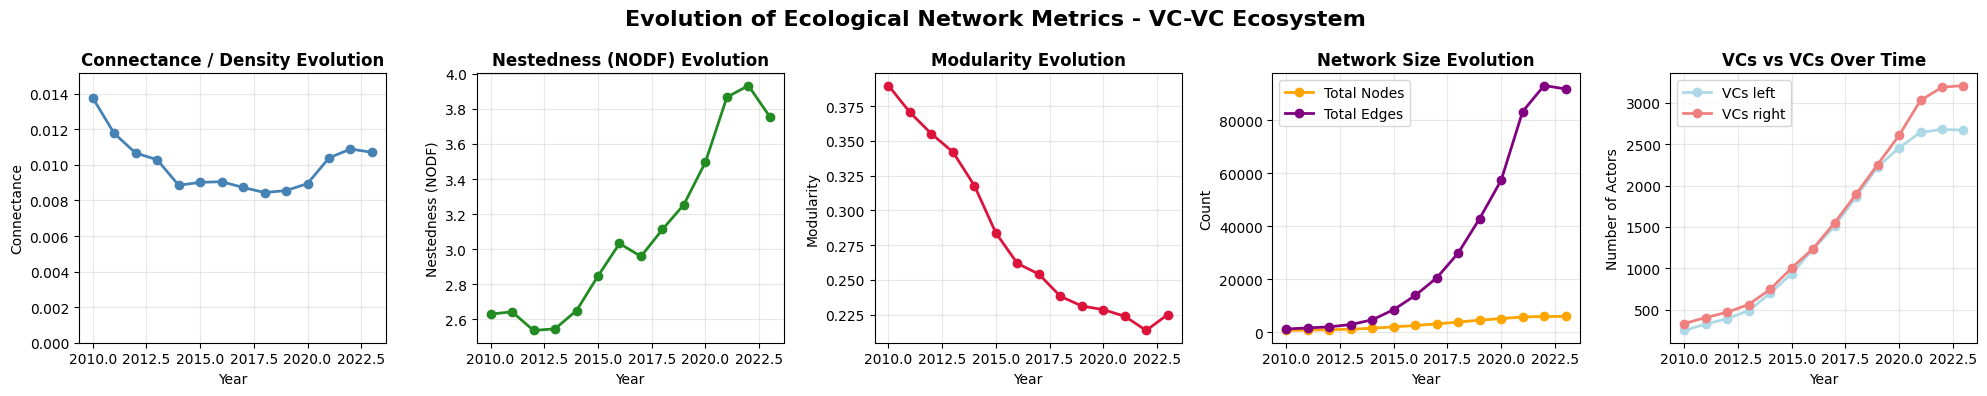

In [13]:
if len(ts_cumulative_df) > 0:
    # Create comprehensive time series plot
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle('Evolution of Ecological Network Metrics - VC-VC Ecosystem', 
                 fontsize=16, fontweight='bold')
    
    # Connectance evolution
    axes[0].plot(ts_cumulative_df['year'], ts_cumulative_df['connectance'], 'o-', linewidth=2, markersize=6, color='steelblue')
    axes[0].set_title('Connectance / Density Evolution', fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Connectance')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, max(ts_cumulative_df['connectance']) * 1.1)
    
    # Nestedness evolution
    axes[1].plot(ts_cumulative_df['year'], ts_cumulative_df['nestedness_nodf'], 'o-', linewidth=2, markersize=6, color='forestgreen')
    axes[1].set_title('Nestedness (NODF) Evolution', fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Nestedness (NODF)')
    axes[1].grid(True, alpha=0.3)
    
    # Modularity evolution
    axes[2].plot(ts_cumulative_df['year'], ts_cumulative_df['modularity'], 'o-', linewidth=2, markersize=6, color='crimson')
    axes[2].set_title('Modularity Evolution', fontweight='bold')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Modularity')
    axes[2].grid(True, alpha=0.3)
    
    # Network size evolution
    axes[3].plot(ts_cumulative_df['year'], ts_cumulative_df['num_nodes'], 'o-', linewidth=2, markersize=6, color='orange', label='Total Nodes')
    axes[3].plot(ts_cumulative_df['year'], ts_cumulative_df['num_edges'], 'o-', linewidth=2, markersize=6, color='purple', label='Total Edges')
    axes[3].set_title('Network Size Evolution', fontweight='bold')
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Count')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    axes[4].plot(ts_cumulative_df['year'], ts_cumulative_df['num_vcs_left'], 'o-', linewidth=2, markersize=6, 
                color='lightblue', label='VCs left')
    axes[4].plot(ts_cumulative_df['year'], ts_cumulative_df['num_vcs_right'], 'o-', linewidth=2, markersize=6, 
                color='lightcoral', label='VCs right')
    axes[4].set_title('VCs vs VCs Over Time', fontweight='bold')
    axes[4].set_xlabel('Year')
    axes[4].set_ylabel('Number of Actors')
    axes[4].legend()
    axes[4].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for time series visualization")

=== Temporal Trends Analysis ===

Year-over-Year Changes (average):
connectance: -0.0002 per year (total: -0.0031)
nestedness_nodf: +0.0866 per year (total: +1.1258)
modularity: -0.0127 per year (total: -0.1646)
num_nodes: +407.6923 per year (total: +5300.0000)
num_edges: +6974.1538 per year (total: +90664.0000)

Correlations between metrics and time:
connectance: r=-0.394 (decreasing trend)
nestedness_nodf: r=0.943 (increasing trend)
modularity: r=-0.956 (decreasing trend)


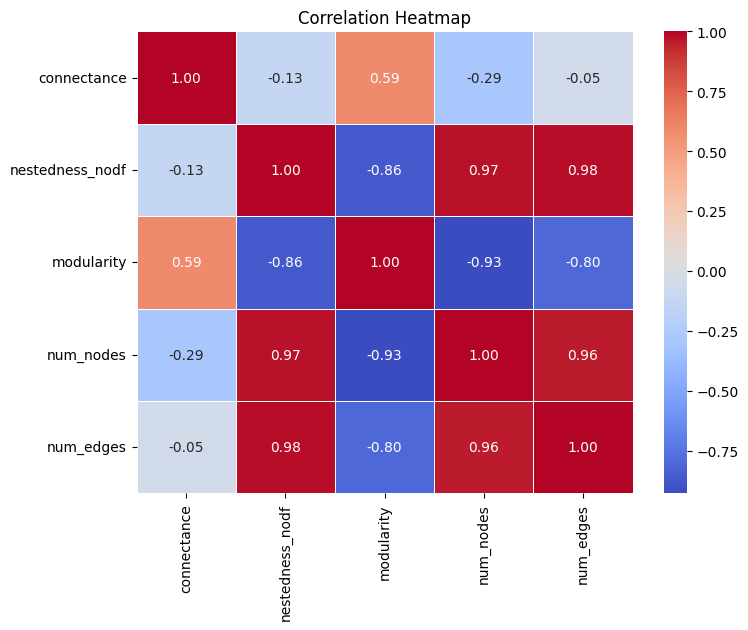

In [14]:
if len(ts_cumulative_df) > 1:
    # Calculate trends and correlations
    print("=== Temporal Trends Analysis ===")
    
    # Calculate year-over-year changes
    ts_cumulative_df_sorted = ts_cumulative_df.sort_values('year')
    
    cumulative_metrics_to_analyze = ['connectance', 'nestedness_nodf', 'modularity', 'num_nodes', 'num_edges']
    
    print("\nYear-over-Year Changes (average):")
    for metric in cumulative_metrics_to_analyze:
        if metric in ts_cumulative_df_sorted.columns:
            # Calculate differences
            diffs = ts_cumulative_df_sorted[metric].diff().dropna()
            avg_change = diffs.mean()
            total_change = ts_cumulative_df_sorted[metric].iloc[-1] - ts_cumulative_df_sorted[metric].iloc[0]
            print(f"{metric}: {avg_change:+.4f} per year (total: {total_change:+.4f})")
    
    # Correlation analysis
    print("\nCorrelations between metrics and time:")
    for metric in ['connectance', 'nestedness_nodf', 'modularity']:
        if metric in ts_cumulative_df.columns:
            correlation = ts_cumulative_df['year'].corr(ts_cumulative_df[metric])
            trend_direction = "increasing" if correlation > 0.1 else "decreasing" if correlation < -0.1 else "stable"
            print(f"{metric}: r={correlation:.3f} ({trend_direction} trend)")
            
    cum_matrix = ts_cumulative_df_sorted[cumulative_metrics_to_analyze].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(cum_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

else:
    print("Insufficient data for temporal trends analysis (need at least 2 years)")